# IMDB Sentiment Analysis - Data Exploration

This notebook explores the IMDB movie reviews dataset and performs initial data analysis.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import load_imdb_data, print_data_stats

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load Dataset

In [2]:
# Load data
df = load_imdb_data('../data/IMDB Dataset.csv')
df.head()

Loading data from ../data/IMDB Dataset.csv...


Loaded 50000 reviews
Columns: ['review', 'sentiment']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 2. Dataset Overview

In [3]:
# Basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (50000, 2)

Column names: ['review', 'sentiment']

Data types:
review       object
sentiment    object
dtype: object

Missing values:
review       0
sentiment    0
dtype: int64


In [4]:
# Print detailed statistics
print_data_stats(df)


DATASET STATISTICS

Total reviews: 50,000

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Positive ratio: 50.00%



Text length statistics:
  Mean: 1309 characters
  Median: 970 characters
  Min: 32 characters
  Max: 13704 characters

Word count statistics:
  Mean: 231 words
  Median: 173 words
  Min: 4 words
  Max: 2470 words




## 3. Sentiment Distribution

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


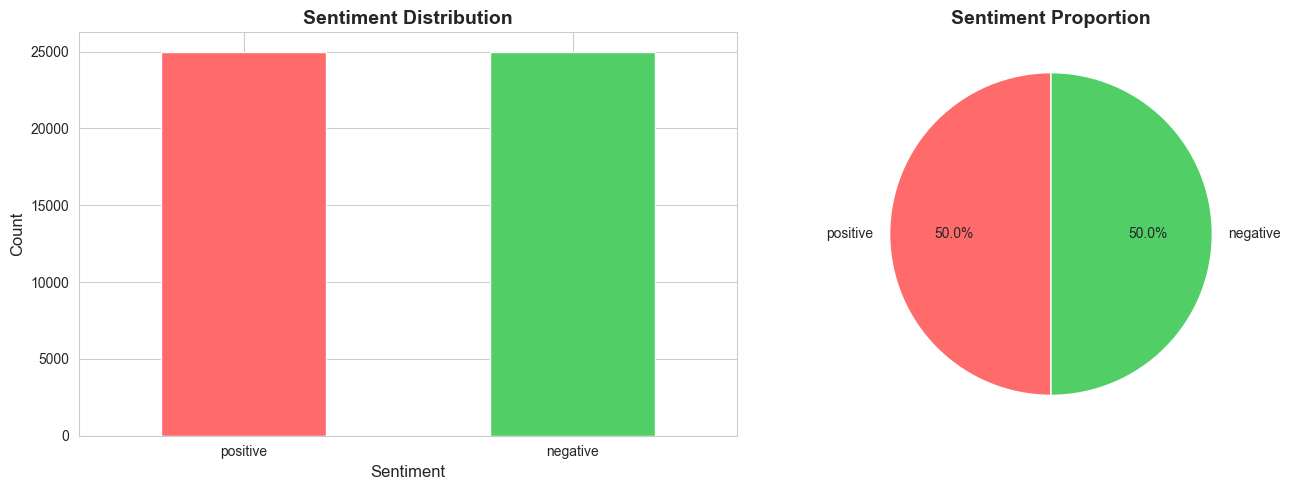

In [5]:
# Sentiment counts
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sentiment_counts.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#51cf66'])
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Pie chart
sentiment_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                      colors=['#ff6b6b', '#51cf66'], startangle=90)
ax2.set_title('Sentiment Proportion', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 4. Text Length Analysis

In [6]:
# Calculate text statistics
df['text_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

# Statistics by sentiment
print("Text length by sentiment:")
print(df.groupby('sentiment')['text_length'].describe())
print("\nWord count by sentiment:")
print(df.groupby('sentiment')['word_count'].describe())

Text length by sentiment:
             count        mean          std   min    25%    50%      75%  \
sentiment                                                                  
negative   25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive   25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

               max  
sentiment           
negative    8969.0  
positive   13704.0  

Word count by sentiment:
             count       mean         std   min    25%    50%    75%     max
sentiment                                                                   
negative   25000.0  229.46456  164.947795   4.0  128.0  174.0  278.0  1522.0
positive   25000.0  232.84932  177.497046  10.0  125.0  172.0  284.0  2470.0


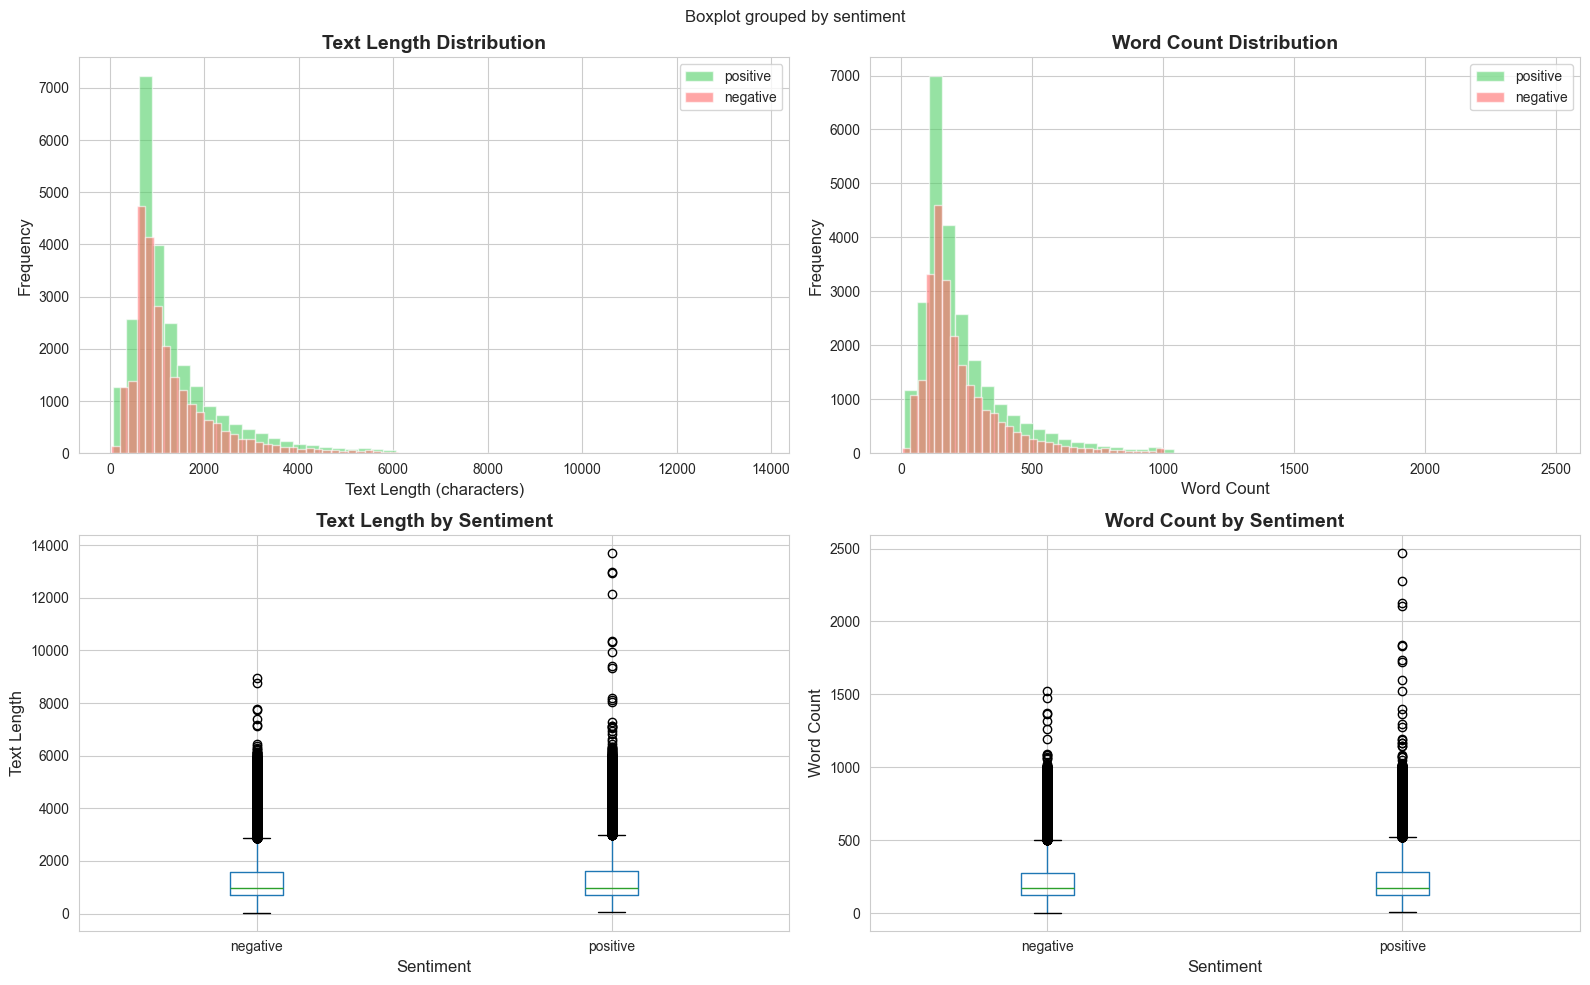

In [7]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Text length histogram
for sentiment, color in [('positive', '#51cf66'), ('negative', '#ff6b6b')]:
    data = df[df['sentiment'] == sentiment]['text_length']
    axes[0, 0].hist(data, bins=50, alpha=0.6, label=sentiment, color=color)
axes[0, 0].set_xlabel('Text Length (characters)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Text Length Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# Word count histogram
for sentiment, color in [('positive', '#51cf66'), ('negative', '#ff6b6b')]:
    data = df[df['sentiment'] == sentiment]['word_count']
    axes[0, 1].hist(data, bins=50, alpha=0.6, label=sentiment, color=color)
axes[0, 1].set_xlabel('Word Count', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()

# Box plots
df.boxplot(column='text_length', by='sentiment', ax=axes[1, 0])
axes[1, 0].set_title('Text Length by Sentiment', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment', fontsize=12)
axes[1, 0].set_ylabel('Text Length', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

df.boxplot(column='word_count', by='sentiment', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment', fontsize=12)
axes[1, 1].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 5. Sample Reviews

In [8]:
# Show sample positive reviews
print("="*80)
print("SAMPLE POSITIVE REVIEWS")
print("="*80)
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1):
    print(f"\n{i}. {review[:500]}...")

# Show sample negative reviews
print("\n" + "="*80)
print("SAMPLE NEGATIVE REVIEWS")
print("="*80)
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1):
    print(f"\n{i}. {review[:500]}...")

SAMPLE POSITIVE REVIEWS

1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the wa

## 6. Key Findings

### Dataset Characteristics:
- **Size**: 50,000 movie reviews
- **Balance**: Perfectly balanced (25,000 positive, 25,000 negative)
- **Quality**: No missing values

### Text Statistics:
- Reviews vary significantly in length
- Both positive and negative reviews have similar length distributions
- Average review contains ~200-300 words

### Next Steps:
1. Text preprocessing (cleaning, tokenization)
2. Feature extraction (TF-IDF)
3. Model training and evaluation